In [1]:
import pandas as pd
import numpy as np

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [36]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from matplotlib import pyplot as plt
from pandas import date_range


In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [5]:
df = pd.read_csv('Economic.csv')
df.head()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
0,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,80000000.0,313107,228,44,11,380000,405,534,134
1,2013,2,1878731,2587,0.645,165.50,324295,0.060,0.629,557,360700000.0,885681,809,50,10,359500,332,196,13
2,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,10550000.0,106386,128,6,6,400000,479,12,0
3,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,150000000.0,350000,254,14,8,403000,558,91,24
4,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,222200000.0,457374,402,12,4,425500,809,63,0


In [6]:
df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [7]:
df['Date']

0    2013-01-01
1    2013-02-01
2    2013-03-01
3    2013-04-01
4    2013-05-01
        ...    
79   2019-08-01
80   2019-09-01
81   2019-10-01
82   2019-11-01
83   2019-12-01
Name: Date, Length: 84, dtype: datetime64[ns]

In [8]:
#Finding ifthe data is stationary or non-statioanry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Year                            84 non-null     int64         
 1   Month                           84 non-null     int64         
 2   logan_passengers                84 non-null     int64         
 3   logan_intl_flights              84 non-null     int64         
 4   hotel_occup_rate                84 non-null     float64       
 5   hotel_avg_daily_rate            84 non-null     float64       
 6   total_jobs                      84 non-null     int64         
 7   unemp_rate                      84 non-null     float64       
 8   labor_force_part_rate           84 non-null     float64       
 9   pipeline_unit                   84 non-null     int64         
 10  pipeline_total_dev_cost         84 non-null     float64       
 11  pipeline

<Axes: xlabel='Date'>

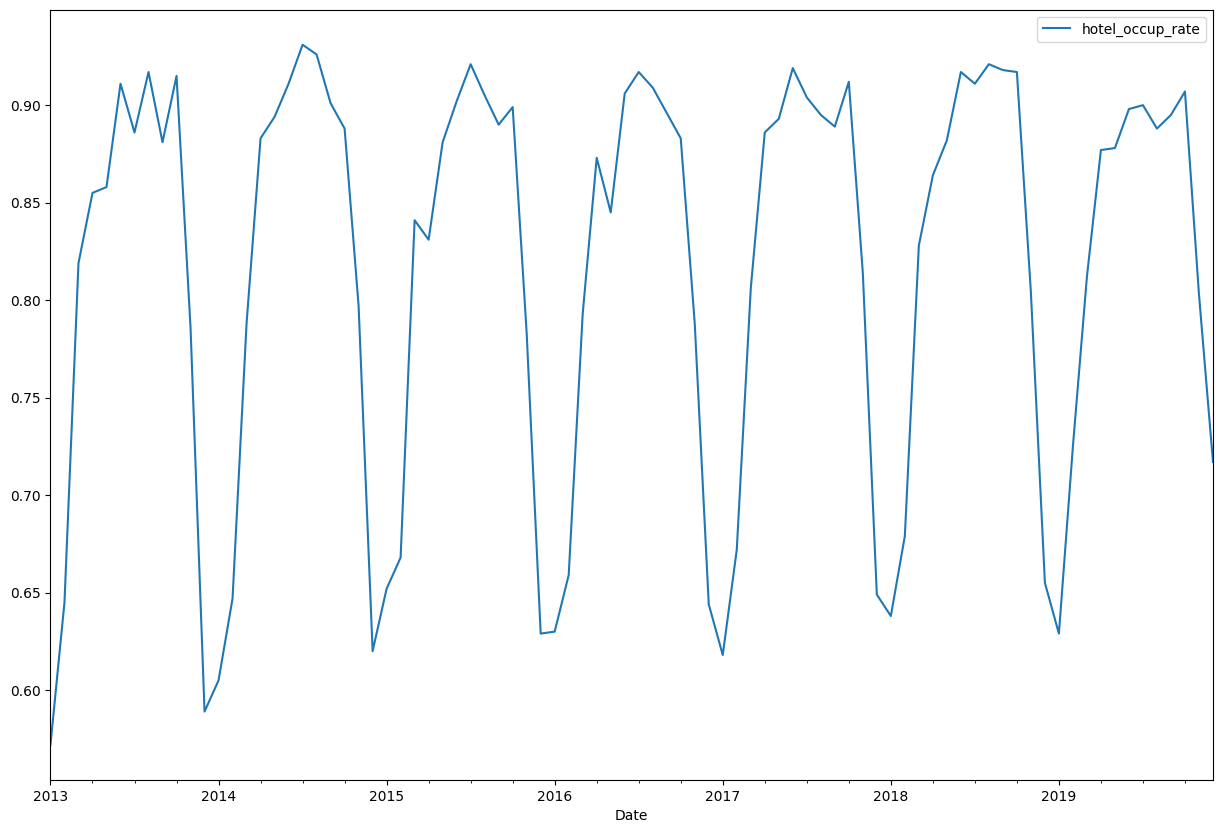

In [9]:
#df['Year'] = pd.to_datetime(df['Year']) # convert date column to DateTime
df.plot(x='Date', y='hotel_occup_rate', figsize=(15,10))
#df['hotel_occup_rate'].plot(figsize=(20,10))

In [10]:
df.head()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits,Date
0,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,80000000.0,313107,228,44,11,380000,405,534,134,2013-01-01
1,2013,2,1878731,2587,0.645,165.50,324295,0.060,0.629,557,360700000.0,885681,809,50,10,359500,332,196,13,2013-02-01
2,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,10550000.0,106386,128,6,6,400000,479,12,0,2013-03-01
3,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,150000000.0,350000,254,14,8,403000,558,91,24,2013-04-01
4,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,222200000.0,457374,402,12,4,425500,809,63,0,2013-05-01


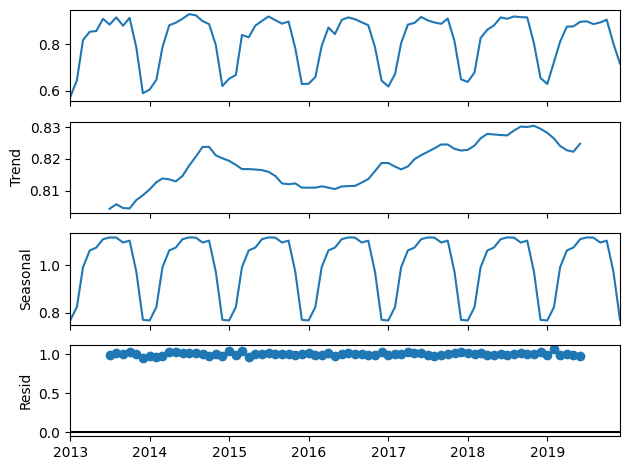

In [11]:
df.set_index('Date', inplace=True)
analysis = df[['hotel_occup_rate']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

In [12]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df['hotel_occup_rate'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.690633
p-value                         0.435945
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [13]:
#Since my test stats result is more than critical values and p value is more than 0.05, it rejects the null hypothesis.

In [14]:
#The data is not stationary hence need to do tranformation

In [15]:
df['hotel_occup_rate'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 84 entries, 2013-01-01 to 2019-12-01
Series name: hotel_occup_rate
Non-Null Count  Dtype  
--------------  -----  
84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


#Transformation

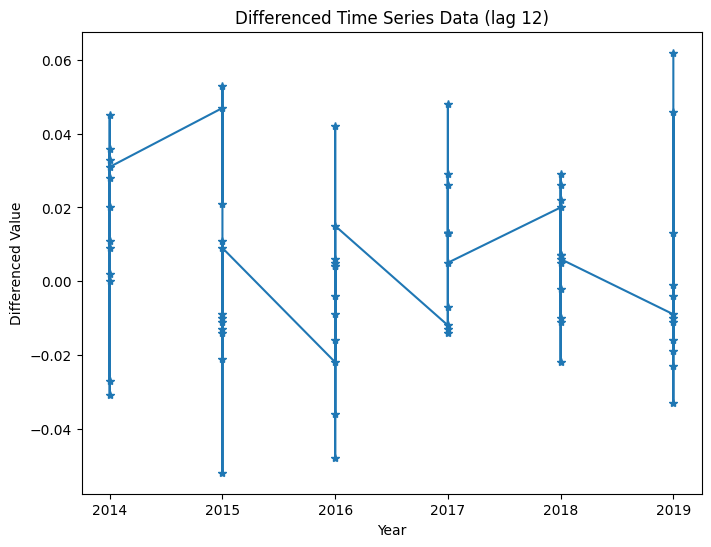

ADF Statistic: -2.950936274517303
p-value: 0.03973736660959741
Critical Values:
   1%: -3.5443688564814813
   5%: -2.9110731481481484
   10%: -2.5931902777777776
The time series is likely stationary (reject the null hypothesis)


In [16]:
df['stationary_data'] = df['hotel_occup_rate'] - df['hotel_occup_rate'].shift(12)
#df['stationary_data'] = df['stationary_data_6'] - df['stationary_data_6'].shift(1)

# Plot the differenced time series data
plt.figure(figsize=(8, 6))
plt.plot(df['Year'], df['stationary_data'], marker='*', linestyle='-')
plt.title('Differenced Time Series Data (lag 12)')
plt.xlabel('Year')
plt.ylabel('Differenced Value')
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(df['stationary_data'].dropna(), autolag='AIC')

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis)')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis)')

In [17]:
df.head(10)

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits,stationary_data
Date,,,,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,8.000000e+07,313107,228,44,11,380000,405,534,134,NaN
2013-02-01,2013,2,1878731,2587,0.645,165.50,324295,0.060,0.629,557,3.607000e+08,885681,809,50,10,359500,332,196,13,NaN
2013-03-01,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,1.055000e+07,106386,128,6,6,400000,479,12,0,NaN
2013-04-01,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,1.500000e+08,350000,254,14,8,403000,558,91,24,NaN
2013-05-01,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,2.222000e+08,457374,402,12,4,425500,809,63,0,NaN
2013-06-01,2013,6,2824862,3402,0.911,244.45,329151,0.070,0.645,482,1.435000e+08,632666,405,14,13,445000,864,352,47,NaN
2013-07-01,2013,7,2978718,3660,0.886,221.20,329650,0.068,0.645,1376,6.409244e+08,1482428,1029,19,11,429000,909,462,44,NaN
2013-08-01,2013,8,3020074,3700,0.917,223.00,330525,0.063,0.643,134,5.789770e+07,283502,203,11,8,435000,989,20,3,NaN
2013-09-01,2013,9,2504491,3181,0.881,255.50,326334,0.063,0.635,833,1.021000e+09,1380698,1112,19,6,438000,677,357,23,NaN


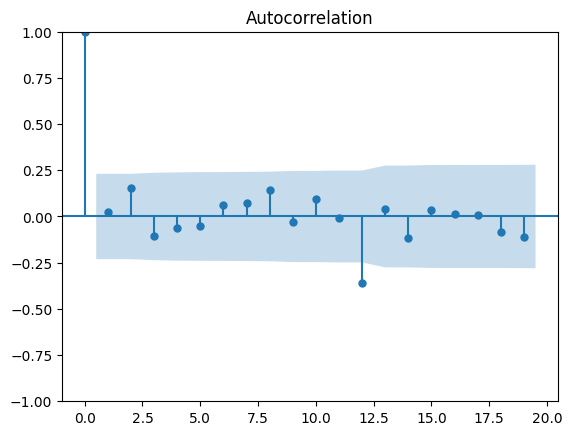

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
from math import sqrt

fig = plot_acf(df['stationary_data'].dropna())
plt.show()

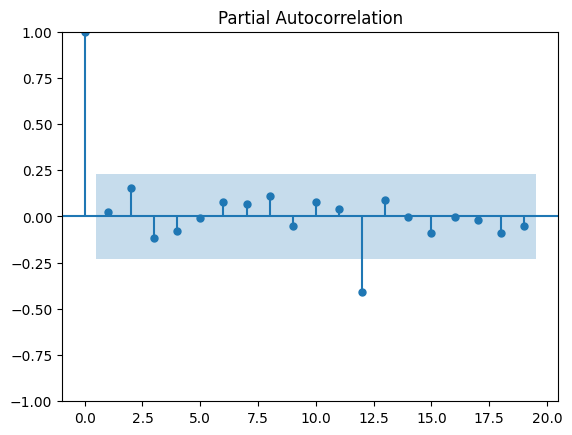

In [19]:
pacf_plot=plot_pacf(df.stationary_data.dropna())

#Model AR - using ACF plot
##ACF plot follows a sinusoidal plot where the valus are gradually decreasing - hence not MA model for prediction
##Also ploted a PACF plot where the values are again gradually decreasing - hence need to try ARMA and AR to be 100% sure

In [20]:
print(df['hotel_occup_rate'].info())
print(df['hotel_occup_rate'])

<class 'pandas.core.series.Series'>
DatetimeIndex: 84 entries, 2013-01-01 to 2019-12-01
Series name: hotel_occup_rate
Non-Null Count  Dtype  
--------------  -----  
84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None
Date
2013-01-01    0.572
2013-02-01    0.645
2013-03-01    0.819
2013-04-01    0.855
2013-05-01    0.858
              ...  
2019-08-01    0.888
2019-09-01    0.895
2019-10-01    0.907
2019-11-01    0.803
2019-12-01    0.717
Name: hotel_occup_rate, Length: 84, dtype: float64


In [21]:
from statsmodels.tsa.arima_model import ARMA

##Lower the AIC value, better the model.
##Hence, on increasing the lags, itis found that the LIC value is te least at lag 12

In [22]:
arma_11 = sm.tsa.ARIMA(df['stationary_data'], order=(1, 0, 1))
arma_results = arma_11.fit()
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 167.735
Date:                Sun, 10 Dec 2023   AIC                           -327.471
Time:                        11:36:20   BIC                           -317.747
Sample:                    01-01-2013   HQIC                          -323.562
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.003      1.447      0.148      -0.001       0.010
ar.L1         -0.7918      0.653     -1.212      0.225      -2.072       0.488
ma.L1          0.7345      0.715      1.027      0.3

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
# Fit ARMA model
arma_12 = sm.tsa.ARIMA(df['stationary_data'], order=(1, 0, 2))
arma_results = arma_12.fit()

# Print model summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 168.874
Date:                Sun, 10 Dec 2023   AIC                           -327.749
Time:                        11:36:23   BIC                           -315.595
Sample:                    01-01-2013   HQIC                          -322.863
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.003      1.296      0.195      -0.002       0.011
ar.L1         -0.2765      0.616     -0.449      0.654      -1.484       0.931
ma.L1          0.3240      0.608      0.532      0.5

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
# Fit ARMA model
arma_21 = sm.tsa.ARIMA(df['stationary_data'], order=(2, 0, 1))
arma_results = arma_21.fit()

# Print model summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 167.616
Date:                Sun, 10 Dec 2023   AIC                           -325.231
Time:                        11:36:25   BIC                           -313.077
Sample:                    01-01-2013   HQIC                          -320.345
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.003      1.362      0.173      -0.002       0.010
ar.L1         -0.9466      0.223     -4.248      0.000      -1.383      -0.510
ar.L2          0.0173      0.134      0.130      0.8

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
# Fit ARMA model
arma_22 = sm.tsa.ARIMA(df['stationary_data'], order=(2, 0, 2))
arma_results = arma_22.fit()

# Print model summary
print(arma_results.summary())

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 171.531
Date:                Sun, 10 Dec 2023   AIC                           -331.061
Time:                        11:36:27   BIC                           -316.477
Sample:                    01-01-2013   HQIC                          -325.198
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.003      1.202      0.229      -0.002       0.010
ar.L1          0.0261      0.196      0.133      0.894      -0.358       0.410
ar.L2         -0.6728      0.174     -3.866      0.0

In [26]:
# Fit ARMA model
arma_32 = sm.tsa.ARIMA(df['stationary_data'], order=(3, 0, 3))
arma_results = arma_32.fit()

# Print model summary
print(arma_results.summary())

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 169.725
Date:                Sun, 10 Dec 2023   AIC                           -323.449
Time:                        11:36:30   BIC                           -304.003
Sample:                    01-01-2013   HQIC                          -315.632
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.003      1.528      0.127      -0.001       0.010
ar.L1          0.6304      0.648      0.973      0.330      -0.639       1.900
ar.L2         -0.0147      0.725     -0.020      0.9

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
# Fit ARMA model
arma_00 = sm.tsa.ARIMA(df['stationary_data'], order=(0, 0, 0))
arma_results = arma_00.fit()

# Print model summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:                          ARIMA   Log Likelihood                 167.437
Date:                Sun, 10 Dec 2023   AIC                           -330.874
Time:                        11:36:32   BIC                           -326.012
Sample:                    01-01-2013   HQIC                          -328.920
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.003      1.454      0.146      -0.001       0.010
sigma2         0.0006   9.85e-05      5.681      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.06   Jarque-

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
# Fit ARMA model
arma_99 = sm.tsa.ARIMA(df['stationary_data'], order=(9, 0, 9))
arma_results = arma_99.fit()

# Print model summary
print(arma_results.summary())

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:                 ARIMA(9, 0, 9)   Log Likelihood                 174.544
Date:                Sun, 10 Dec 2023   AIC                           -309.089
Time:                        11:36:35   BIC                           -260.472
Sample:                    01-01-2013   HQIC                          -289.545
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.003      1.381      0.167      -0.002       0.010
ar.L1          0.1815      4.025      0.045      0.964      -7.707       8.071
ar.L2          0.3067      1.493      0.205      0.8

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
# Fit ARMA model
arma_1212 = sm.tsa.ARIMA(df['stationary_data'], order=(12, 0, 12))
arma_results = arma_1212.fit()

# Print model summary
print(arma_results.summary())

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   84
Model:               ARIMA(12, 0, 12)   Log Likelihood                 183.133
Date:                Sun, 10 Dec 2023   AIC                           -314.266
Time:                        11:36:39   BIC                           -251.065
Sample:                    01-01-2013   HQIC                          -288.860
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.003      1.218      0.223      -0.003       0.011
ar.L1          0.0965      0.341      0.283      0.778      -0.573       0.766
ar.L2          0.1079      0.271      0.399      0.6

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Residual Analysis
##Qualitative - QQ plot - scatter plot on a straight line
##Quantitative - uncorrelation - Ljung Box test - p value must be greater than 0.05 to prove uncorrelation

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum L

Residual Summary Statistics:
Mean: 0.0010324057453229643
Standard Deviation: 0.019349481598124066
Minimum: -0.036191787939974095
25th Percentile: -0.011422331925292399
Median: 0.0003277443678508622
75th Percentile: 0.00971637910082777
Maximum: 0.06036704391402338

Ljung-Box Test Results:
Ljung-Box Test Statistic: lb_stat
P-value: lb_pvalue


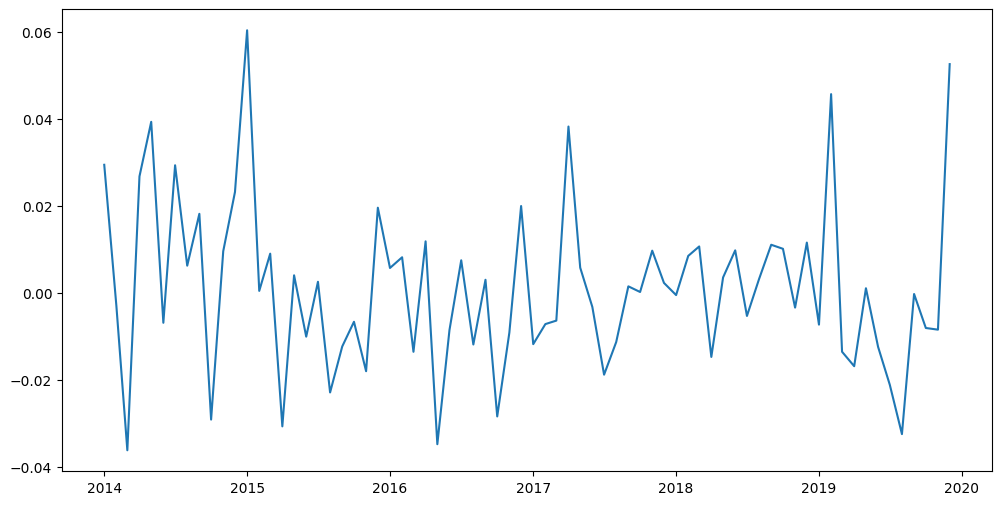

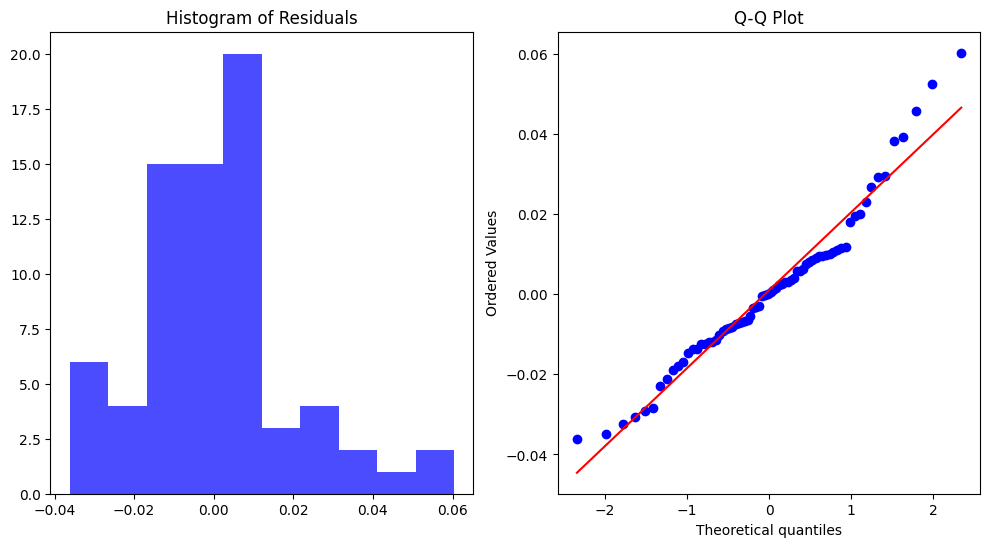

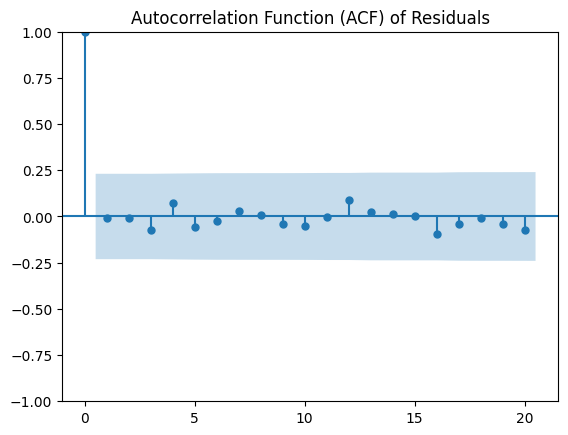

In [30]:
model = sm.tsa.SARIMAX(df['stationary_data'].dropna(), order=(12, 0, 12), trend='c')
model_fit = model.fit(disp=True)
residuals = model_fit.resid
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
residuals_min = np.min(residuals)
residuals_25th_percentile = np.percentile(residuals, 25)
residuals_median = np.median(residuals)
residuals_75th_percentile = np.percentile(residuals, 75)
residuals_max = np.max(residuals)
print("Residual Summary Statistics:")
print(f"Mean: {residuals_mean}")
print(f"Standard Deviation: {residuals_std}")
print(f"Minimum: {residuals_min}")
print(f"25th Percentile: {residuals_25th_percentile}")
print(f"Median: {residuals_median}")
print(f"75th Percentile: {residuals_75th_percentile}")
print(f"Maximum: {residuals_max}")
plt.figure(figsize=(12, 6))
plt.plot(residuals)
stat, p = acorr_ljungbox(residuals, lags=10)
# Print the Ljung-Box Test Results
print("\nLjung-Box Test Results:")
print(f"Ljung-Box Test Statistic: {stat}")
print(f"P-value: {p}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins='auto', color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

In [37]:
df['stationary_data'].value_counts().count()

50

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Absolute Error: 0.019089576358631028
Predicted=-0.006935, Expected=0.006000
Predicted=-0.003614, Expected=-0.009000
Predicted=-0.002035, Expected=0.046000
Predicted=-0.001282, Expected=-0.016000
Predicted=0.023841, Expected=0.013000
Predicted=0.002464, Expected=-0.004000
Predicted=0.001968, Expected=-0.019000
Predicted=0.006620, Expected=-0.011000
Predicted=-0.004315, Expected=-0.033000
Predicted=-0.014319, Expected=-0.023000
Predicted=-0.002346, Expected=-0.010000
Predicted=0.009494, Expected=-0.001000
Predicted=0.006316, Expected=0.062000
Test RMSE: 0.024


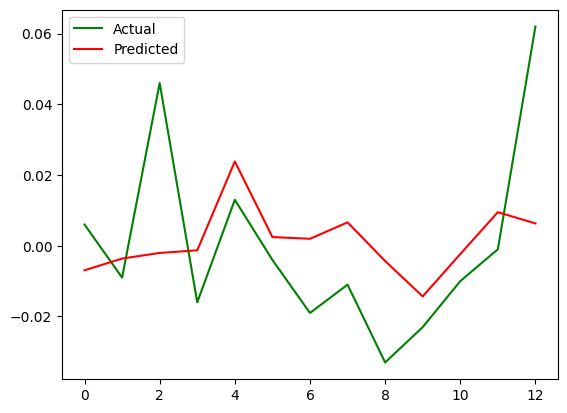

In [38]:
X = df['stationary_data'].values
train, test = X[1:len(X)-13], X[len(X)-13:]
order = (12, 0, 12) 
model = ARIMA(train, order=order)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
mae = mean_absolute_error(test, predictions)
print("Mean Absolute Error:", mae)
for i in range(len(predictions)):
    print('Predicted=%f, Expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test, color='green', label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()